# Maximizing Revenue for taxi cab drivers through payment type analysis
# problem statement
in the fast-paced taxi booking sector making the most of revenue is essential for long term succes and driver happiness.on goal is to use data-driven insight to maximize revenur streams for taxi drivers in order to meet this need our reseacher aims to determine wheather payment method have impact on fare pricing by focusing on the relationship betwwen payment type and fare amount

# objective
this project main goal is to run a A/B test to examine the relationship between the total fare and the method of payment we use hypothesis testing and descriptive statistic to extract usefull information that can help taxi driver generate more cash. in particular we want to find out if ther is a big diffrence in the fares for those who pay with credit cards versus who pay with cash

# research question
in ther a relationship betwwen total fare amount and payment type and can we nudge customer towards payment method that generate higher revenue for driver without impacting customer experience?

# import libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')

data is from data.gov

In [2]:
df=pd.read_csv('tripdata.csv')

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


# Exploratory data analysis

In [4]:
df.shape

(6405008, 18)

In [5]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [6]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [7]:
df['duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df['duration']=df['duration'].dt.total_seconds()/60

In [8]:
df['duration']

0           4.800000
1           7.416667
2           6.183333
3           4.850000
4           2.300000
             ...    
6405003    31.000000
6405004    76.000000
6405005    27.833333
6405006    22.650000
6405007    22.000000
Name: duration, Length: 6405008, dtype: float64

In [9]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000


In [10]:
# extract only required data
df=df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [11]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


In [12]:
# missing value
df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [13]:
(65441/len(df))*100

1.021716132126611

In [14]:
df.dropna(inplace=True)

In [15]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [16]:
# convert to int
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type']=df['payment_type'].astype('int64')

In [17]:
# duplicate value
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(3007861, 5)

In [20]:
# value count give frequency of data
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [21]:
df['payment_type'].value_counts(normalize=True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [22]:
# remove less contribution
df=df[df['payment_type']<3]
df=df[(df['passenger_count']>0) &(df['passenger_count']<6)]

In [23]:
df.shape

(2780283, 5)

In [24]:
# replace value of 1 and 2 to card and cash
df['payment_type'].replace([1,2],['card','cash'],inplace=True)

In [25]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,card,6.0,1.20,4.800000
1,1,card,7.0,1.20,7.416667
2,1,card,6.0,0.60,6.183333
3,1,card,5.5,0.80,4.850000
4,1,cash,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,card,10.0,2.09,14.800000
6339561,1,card,17.5,4.11,21.500000
6339563,1,card,13.0,2.13,19.000000
6339564,1,card,12.5,2.55,16.283333


In [26]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [27]:
# here the trip is cover some amount of distance so min should be not negative remove min
df=df[df['fare_amount']>0]
df=df[df['trip_distance']>0]
df=df[df['duration']>0]

In [28]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,card,6.0,1.20,4.800000
1,1,card,7.0,1.20,7.416667
2,1,card,6.0,0.60,6.183333
3,1,card,5.5,0.80,4.850000
5,1,cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,card,10.5,2.40,12.383333
6339555,3,card,10.0,2.09,14.800000
6339561,1,card,17.5,4.11,21.500000
6339563,1,card,13.0,2.13,19.000000


(array([2.748913e+06, 1.600000e+01, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.000000e-02, 4.265090e+02, 8.530080e+02, 1.279507e+03,
        1.706006e+03, 2.132505e+03, 2.559004e+03, 2.985503e+03,
        3.412002e+03, 3.838501e+03, 4.265000e+03]),
 <BarContainer object of 10 artists>)

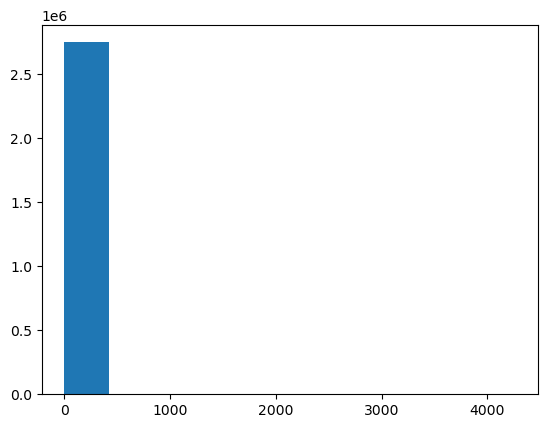

In [29]:
# check the outlier present or not
plt.hist(df['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21f87060bf0>,
 'caps': [<matplotlib.lines.Line2D at 0x21f87061100>,
 'boxes': [<matplotlib.lines.Line2D at 0x21f84a5b050>],
 'medians': [<matplotlib.lines.Line2D at 0x21f870615e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21f87061820>],
 'means': []}

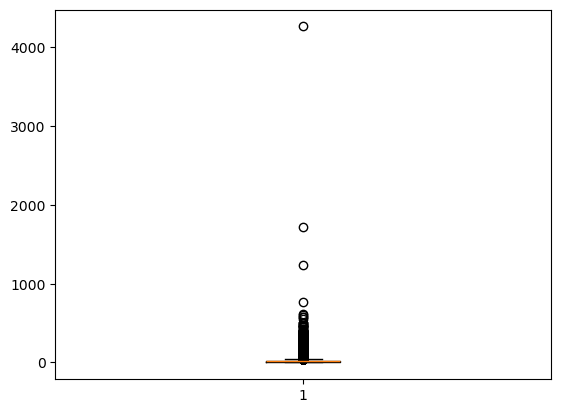

In [30]:
plt.boxplot(df['fare_amount'])

In [31]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,1.766835e+01,4.583313e+00,2.418261e+01
std,1.179440e+00,1.447531e+01,4.897806e+00,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.530000e+00,9.950000e+00
50%,1.000000e+00,1.300000e+01,2.770000e+00,1.575000e+01
75%,2.000000e+00,2.100000e+01,5.500000e+00,2.333333e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


25% (First Quartile or Q1):
This value indicates that 25% of the data points in that specific column are less than or equal to this value.
50% (Second Quartile or Q2 / Median):
This value represents the median of the data, meaning 50% of the data points are less than or equal to this value, and 50% are greater than or equal to it. It effectively divides the dataset into two equal halves. 
75% (Third Quartile or Q3):
This value indicates that 75% of the data points in that specific column are less than or equal to this value.
These percentiles, along with the minimum, maximum, mean, and standard deviation, provide a summary of the central tendency, spread, and distribution of the data within each numeric column. They are particularly useful for understanding the dispersion and potential skewness of the data. For example, a large difference between the 50% and 75% values compared to the difference between 25% and 50% might suggest a right-skewed distribution.

In [32]:
# find the outlier which is two type zscore=x-meu/std and Inter quantile range(IQR)=q3-q1

for col in ['fare_amount','trip_distance','duration']:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    
    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR

    df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

In [33]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,card,6.0,1.20,4.800000
1,1,card,7.0,1.20,7.416667
2,1,card,6.0,0.60,6.183333
3,1,card,5.5,0.80,4.850000
5,1,cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,card,10.5,2.40,12.383333
6339555,3,card,10.0,2.09,14.800000
6339561,1,card,17.5,4.11,21.500000
6339563,1,card,13.0,2.13,19.000000


In [34]:
print(df.columns)

Index(['passenger_count', 'payment_type', 'fare_amount', 'trip_distance',
       'duration'],
      dtype='object')


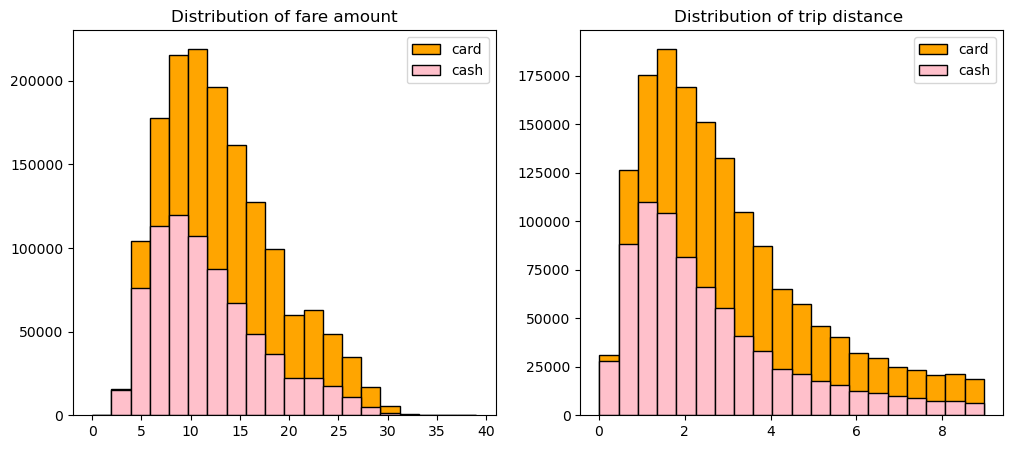

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
plt.hist(df[df['payment_type']=='card']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='orange',label='card')
plt.hist(df[df['payment_type']=='cash']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='pink',label='cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of trip distance ')
plt.hist(df[df['payment_type']=='card']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='orange',label='card')
plt.hist(df[df['payment_type']=='cash']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='pink',label='cash')
plt.legend()
plt.show()

In [36]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
card           13.112493  5.849281      2.992237  1.99274
cash           11.758005  5.613038      2.602207  1.91372

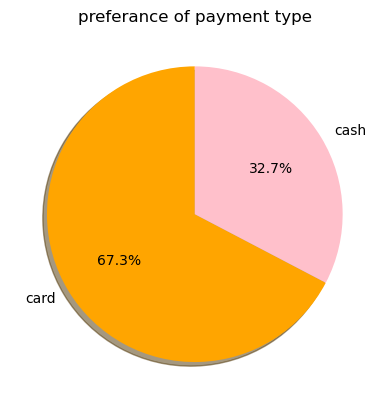

In [98]:
# preferance of payment type
plt.title('preferance of payment type')
plt.pie(df['payment_type'].value_counts(normalize=True),labels=df['payment_type'].value_counts().index,startangle=90,shadow=True,autopct='%1.1f%%',colors=['orange','pink'])
plt.show()

In [37]:
print(df.columns)

Index(['passenger_count', 'payment_type', 'fare_amount', 'trip_distance',
       'duration'],
      dtype='object')


In [38]:
# passenger count analysis
df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

passenger_count
payment_type passenger_count                 
card         1                         909245
             2                         327661
             3                         122412
             4                          63676
             5                         124045
cash         1                         460550
             2                         155472
             3                          54506
             4                          32715
             5                          47626

In [39]:
passenger_count=df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count':'count'},inplace=True)
passenger_count.reset_index(inplace=True)

In [40]:
print(df.columns)

Index(['passenger_count', 'payment_type', 'fare_amount', 'trip_distance',
       'duration'],
      dtype='object')


In [41]:
passenger_count['perc']=(passenger_count['count']/passenger_count['count'].sum())*100

In [42]:
passenger_count

,payment_type,passenger_count,count,perc
0,card,1,909245,39.568381
1,card,2,327661,14.259100
2,card,3,122412,5.327106
3,card,4,63676,2.771042
4,card,5,124045,5.398171
5,cash,1,460550,20.042143
6,cash,2,155472,6.765806
7,cash,3,54506,2.371984
8,cash,4,32715,1.423686
9,cash,5,47626,2.072581


In [43]:
# to get a custom bar chart we create dataframe
dff=pd.DataFrame(columns=['payment_type',1,2,3,4,5])
dff['payment_type']=['card','cash']
dff.iloc[0,1:]=passenger_count.iloc[0:5,-1]
dff.iloc[1,1:]=passenger_count.iloc[5:,-1]
dff

,payment_type,1,2,3,4,5
0,card,39.568381,14.2591,5.327106,2.771042,5.398171
1,cash,20.042143,6.765806,2.371984,1.423686,2.072581


In [44]:
print(df.columns)

Index(['passenger_count', 'payment_type', 'fare_amount', 'trip_distance',
       'duration'],
      dtype='object')


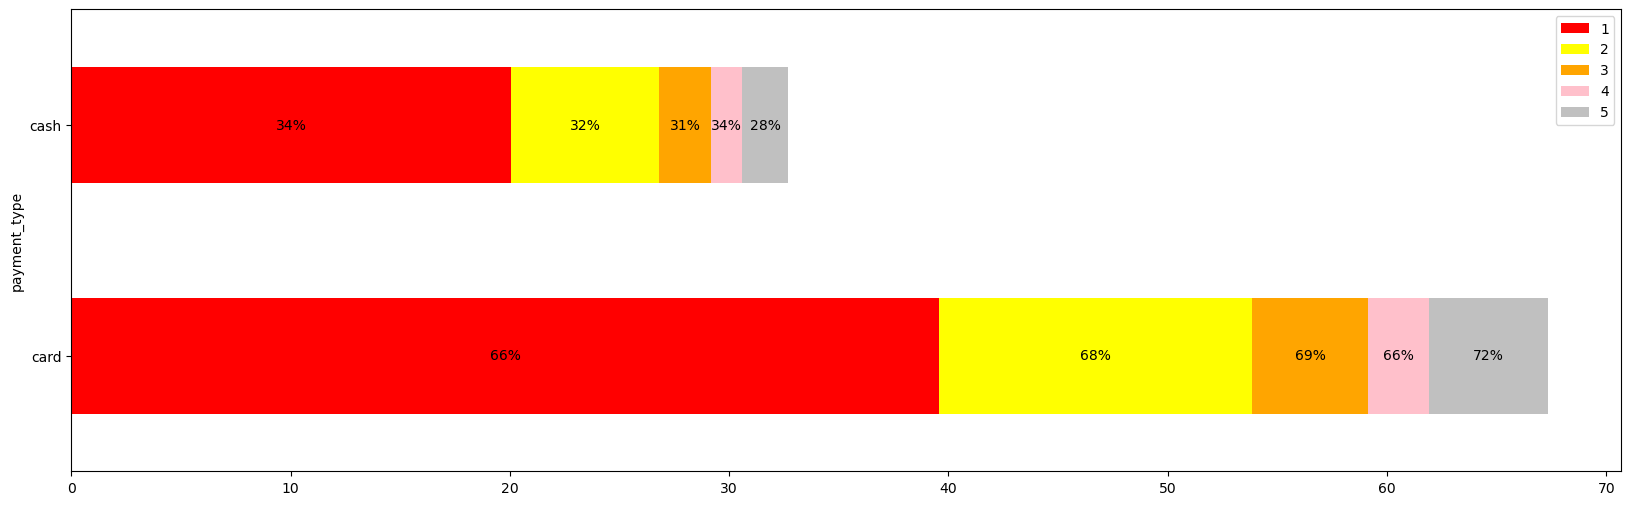

In [45]:
fig, ax = plt.subplots(figsize=(20, 6))

# Plot stacked bar chart
dff.plot(
    x='payment_type',
    kind='barh',
    stacked=True,
    color=['red','yellow','orange','pink','silver'],
    ax=ax
)

# Add percentage text
for container in ax.containers:  # iterate over each bar segment group
    labels = []
    for rect in container:
        width = rect.get_width()
        if width > 0:  # only label non-empty segments
            # Get total row sum for this bar
            total = sum([r.get_width() for r in container])
            percent = 100 * width / total
            labels.append(f"{percent:.0f}%")
        else:
            labels.append("")
    ax.bar_label(container, labels=labels, label_type="center")

In [46]:
print(df.columns)


Index(['passenger_count', 'payment_type', 'fare_amount', 'trip_distance',
       'duration'],
      dtype='object')



* NUll Hypotesis: there is no diffrence in avg fare between customer who use cards and customers who use cash
* Alternative Hypotesis:there is differnce in avg fare between customers who use credit cards and customers who use cash

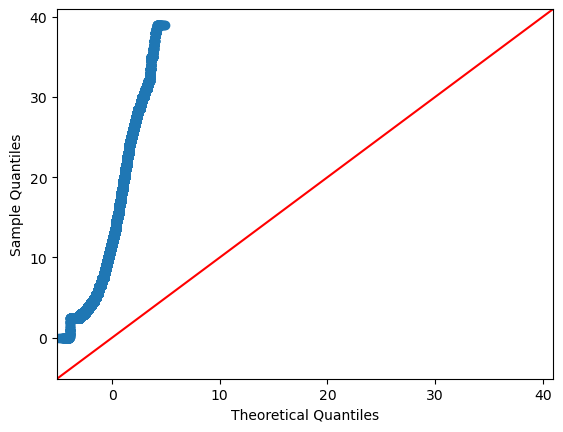

In [51]:
# with hypotestis test we are proved that customer are prepared card payment rather than cash payment is right
# qq plot for checking normal distribution

sm.qqplot(df['fare_amount'],line='45')
plt.show()

In [54]:
# t-test
card_sample = df[df['payment_type']=='card']['fare_amount']
cash_sample=df[df['payment_type']=='cash']['fare_amount']

In [55]:
from scipy import stats

t_stats, p_value = stats.ttest_ind(a=card_sample, b=cash_sample, equal_var=False)
print("T statistic:", t_stats, "p-value:", p_value)


T statistic: 169.2111527245052 p-value: 0.0
